In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('parks_budget.csv',index_col='id')

In [57]:
df=df.drop(['program'],axis=1)
df.head()

,fiscal_year,function_,department,Type,Type_Detail,approved_amount,fund_type,exFund,ExpenseType,ObjectId
id,,,,,,,,,,
0,2019,Culture and Recreation,Parks and Recreation,General Supplies,Special Department Supplies,89008,General,General,Expenditures,17
1,2019,Culture and Recreation,Parks and Recreation,General Supplies,Sports Equipment,16000,Special Revenue,Special Revenue,Expenditures,29
2,2019,Culture and Recreation,Parks and Recreation,Building Maintenance,Building Repair Materials,230,General,General,Expenditures,47
3,2019,Culture and Recreation,Parks and Recreation,Rentals,Laundry & Uniform Rental,1165,General,General,Expenditures,65
4,2019,Culture and Recreation,Parks and Recreation,General Supplies,Office Supplies,15728,General,General,Expenditures,66


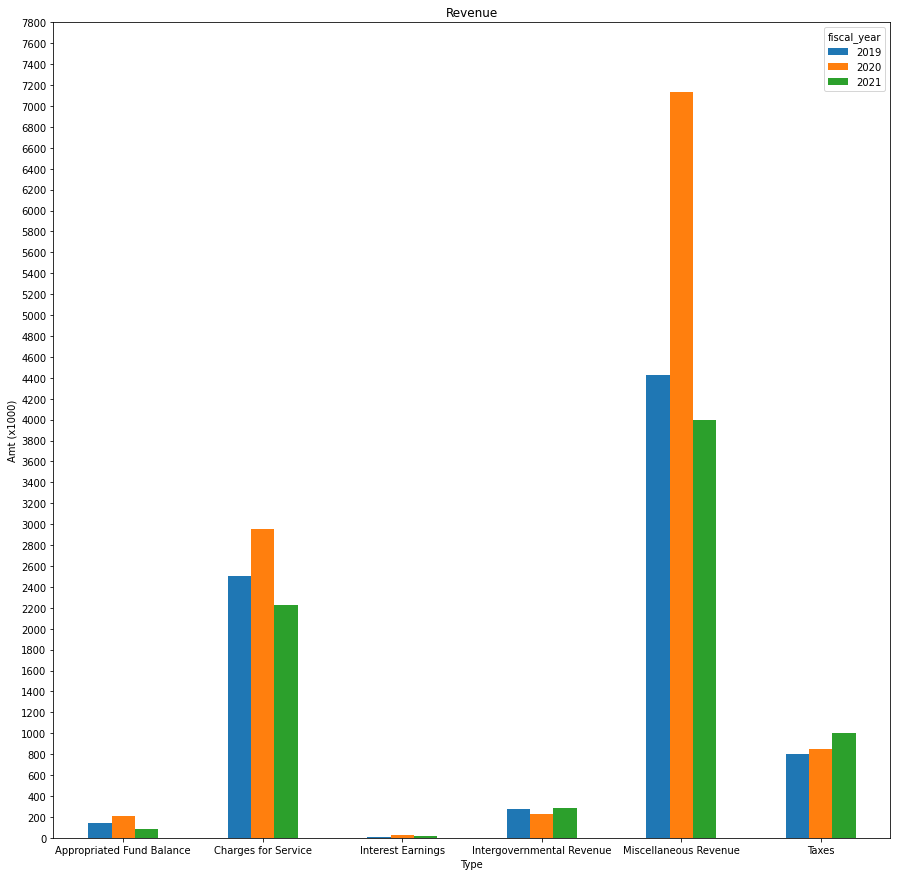

In [246]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df2=df[df['ExpenseType']=='Revenue']
df2.groupby(['Type','fiscal_year']).sum()['approved_amount'].divide(1000).unstack().plot(kind='bar',title='Revenue',ax=ax,legend=True,rot=0)
plt.yticks(list(map(int,np.arange(0,8000,200))))
plt.ylabel('Amt (x1000)')
# plt.show()
plt.savefig('Revenue.png', bbox_inches ="tight")


In [20]:
import matplotlib.pyplot as plt

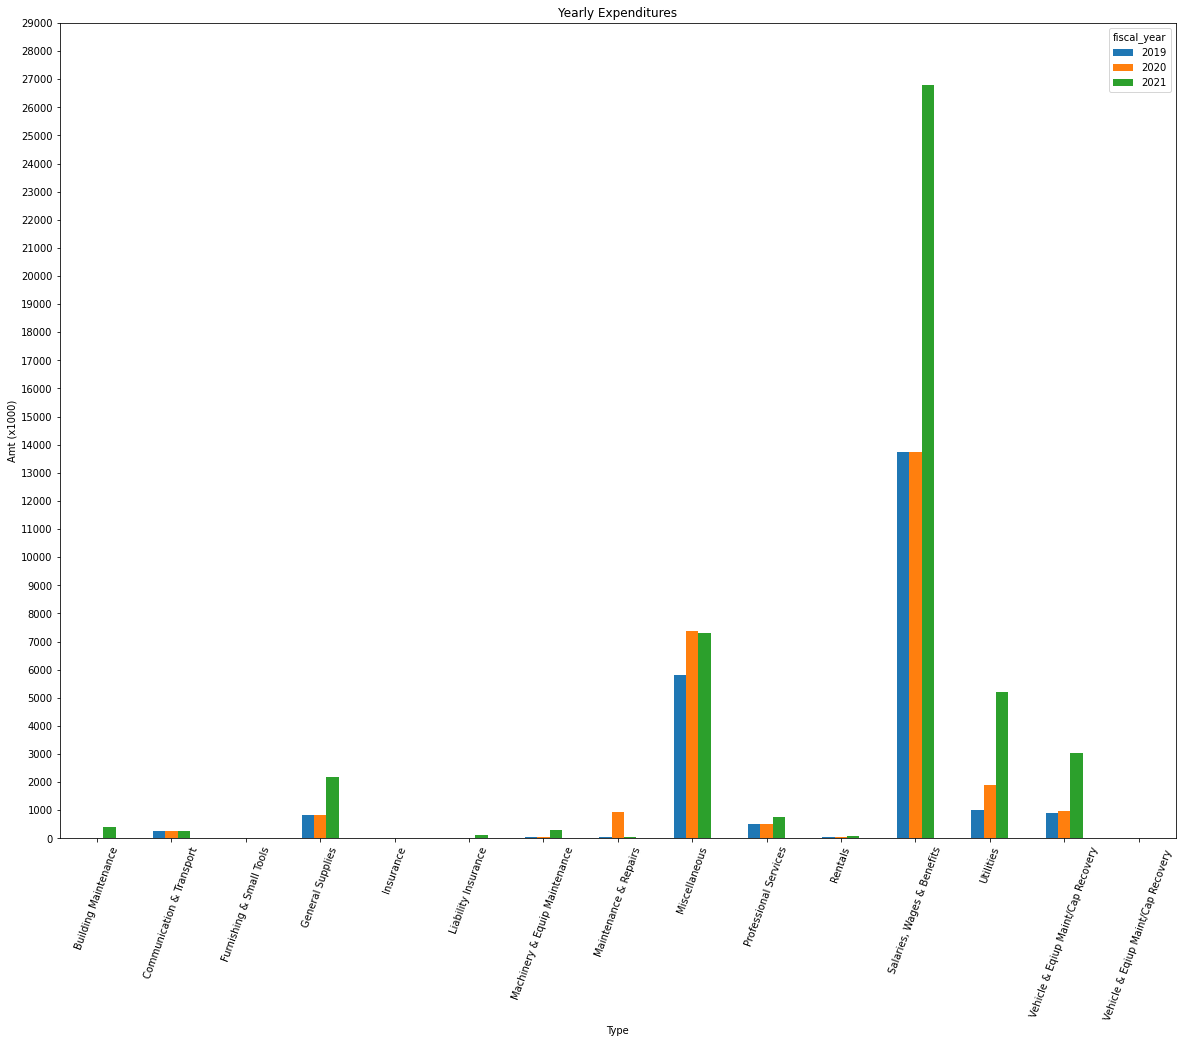

In [247]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df[df['ExpenseType']=='Expenditures'].groupby(['Type','fiscal_year']).sum()['approved_amount'].divide(1000).unstack().plot(kind='bar',ax=ax,title='Yearly Expenditures',legend=True,rot=70)
plt.yticks(list(map(int,np.arange(0,30000,1000))))
plt.ylabel('Amt (x1000)')
# plt.show()
plt.savefig('Expenditures.png', bbox_inches ="tight")


In [236]:
df3=df[df['ExpenseType']=='Revenue'].groupby(['fiscal_year','Type','Type_Detail']).sum()['approved_amount']
df3

fiscal_year  Type                       Type_Detail                      
2019         Appropriated Fund Balance  Appropriated Fund Balance             137500
             Charges for Service        Charges For Labor/Material             40000
                                        Fee Waivers                          -988996
                                        Memberships                           922000
                                        Miscellaneous Fees                    100300
                                                                              ...   
2021         Miscellaneous Revenue      Miscellaneous Rentals                 421092
                                        Other Miscellaneous                   250000
                                        Other Reimbursements                   11011
                                        Rebates & Refunds                      25000
             Taxes                      Residential Park Construction Tax   

['General Supplies', 'Building Maintenance', 'Rentals', 'Machinery & Equip Maintenance', 'Professional Services', 'Salaries, Wages & Benefits', 'Miscellaneous', 'Communication & Transport', 'Vehicle & Eqiup Maint/Cap Recovery', 'Utilities', 'Liability Insurance', 'Insurance', 'Furnishing & Small Tools', 'Maintenance & Repairs', 'Miscellaneous Revenue', 'Charges for Service', 'Intergovernmental Revenue', 'Appropriated Fund Balance', 'Interest Earnings', 'Taxes', 'Vehicle & Eqiup Maint/Cap Recovery ']


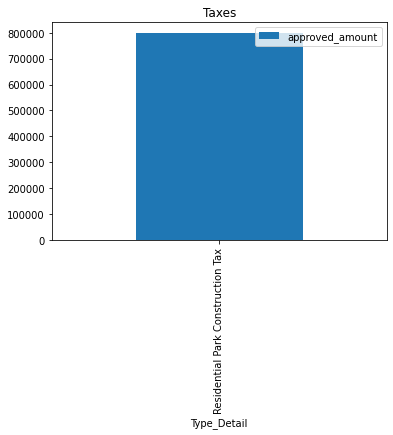

In [244]:

types=list(df['Type'].unique())
print (types)
# for t in types:
df3[2019].xs('Taxes').plot(kind='bar',title='Taxes',legend=True)
#     plt.show()
#     print(t.replace(" ","")+".png")
plt.savefig('Taxes.png', bbox_inches ="tight")
